# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)


[WDM] - Downloading: 100%|█████████████████| 8.84M/8.84M [00:03<00:00, 2.33MB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
browser.visit("https://static.bc-edx.com/data/web/mars_facts/temperature.html")

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = soup(browser.html, "html.parser")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Extract all rows of data   
# Create an empty list
# Loop through the scraped data to create a list of rows
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Confirm DataFrame was created successfully

headers = [h.text for h in html.findAll("th")]
data = [ [td.text for td in row.findAll('td')]\
        for row in html.findAll("tr", class_='data-row') ]

df= pd.DataFrame(data,columns=headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [6]:
# Examine data type of each column
results = df.dtypes
results

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [7]:
# Change data types for data analysis
convert_dict = {
    'id': int,
    'terrestrial_date': 'datetime64[ns]',
    'sol': int, 
    'ls': int, 
    'month': int, 
    'min_temp': float, 
    'pressure': float   
}

df = df.astype(convert_dict)

In [8]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [26]:
# 1. How many months are there on Mars?
months = df['month'].nunique()

print("Number of months on Mars:", months)

Number of months on Mars: 12


In [75]:
# 2. How many Martian days' worth of data are there?
 
# calculate the total number of days in the 'days' column
martian_days = df['sol'].nunique()

print("Total number of Martian days is:", martian_days)

Total number of Martian days is: 1867


In [43]:
# 3. What is the average low temperature by month?

# group the temperature data by month and calculate the mean of low temperature values
monthly_avg_low_temp = df.groupby('month')['min_temp'].mean()

# print the resulting series
print(monthly_avg_low_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


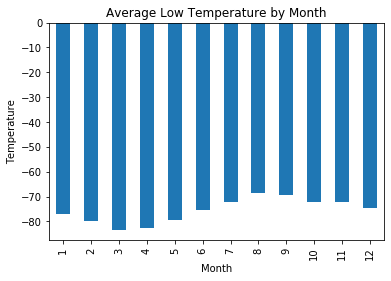

In [22]:
# Plot the average temperature by month
monthly_avg_low_temp.plot(kind='bar')

# set the plot title and axis labels
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')

# show the plot
plt.show()

In [47]:
# Identify the coldest and hottest months in Curiosity's location

# find the month with the highest average low temperature
max_month_low = monthly_avg_low_temp.idxmax()
print(f"The hottest months in Curiosity's location: {max_month_low}")

# find the month with the lowest average high temperature
min_month_high = monthly_avg_low_temp.idxmin()
print(f"The coldest months in Curiosity's location: {min_month_high}")

The hottest months in Curiosity's location: 8
The coldest months in Curiosity's location: 3


In [48]:
# 4. Average pressure by Martian month

# group the pressure data by month and calculate the mean of pressure values
monthly_avg_pressure = df.groupby('month')['pressure'].mean()

# print the resulting series
print(monthly_avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


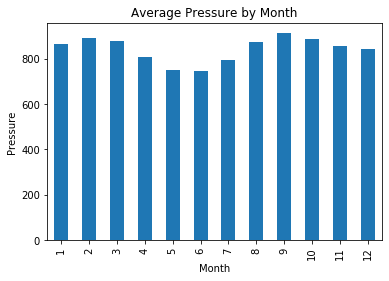

In [49]:
# Plot the average pressure by month
monthly_avg_pressure.plot(kind='bar')

# set the plot title and axis labels
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Pressure')

# show the plot
plt.show()

In [128]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# locating the value of the first row in the ls column
long = df.loc[df['ls'] == df['ls'].loc[0]]

# finding days terrestrial (earth) days are there in a Martian year
earth_days = (long['terrestrial_date'].iloc[1] - long['terrestrial_date'].loc[0]).days

print(f"There are {earth_days} earth days in a Martian year")


There are 686 earth days in a Martian year


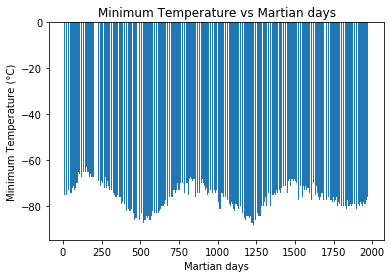

In [135]:
# plotting min temp vs the Martian days

plt.bar(df['sol'], df['min_temp'])
plt.xlabel('Martian days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature vs Martian days')
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [129]:
# Write the data to a CSV
df.to_csv('mars_weather.csv', index=False)

In [ ]:
browser.quit()